Pro. Fernando Amaral  -  [www.eia.ai](https://www.eia.ai)

In [ ]:
#gpu

In [1]:
!pip install diffusers transformers accelerate safetensors

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 18.0 MB/s eta 0:00:00


In [2]:
from diffusers import DiffusionPipeline, StableDiffusionPipeline, EulerDiscreteScheduler, StableDiffusionImageVariationPipeline
import torch
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display
from io import BytesIO
import requests

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

## Unconditional

In [3]:
pretrained_model_or_path = "CompVis/ldm-celebahq-256"

In [4]:
pipeline = DiffusionPipeline.from_pretrained(pretrained_model_or_path)
imagem = pipeline(num_inference_steps=50).images[0]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

vqvae/diffusion_pytorch_model.safetensors not found


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/249 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/712 [00:00<?, ?B/s]

vqvae/config.json:   0%|          | 0.00/486 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/221M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.10G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--ldm-celebahq-256/snapshots/03978f22272a3c2502da709c3940e227c9714bdd/vqvae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--CompVis--ldm-celebahq-256/snapshots/03978f22272a3c2502da709c3940e227c9714bdd/vqvae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--ldm-celebahq-256/snapshots/03978f22272a3c2502da709c3940e227c9714bdd/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--CompVis--ldm-celebahq-256/snapshots/03978f22272a3c2502da709c3940e227c9714bdd/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
The config attributes {'timestep_values': None, 'timesteps': 1000} were passed to DDIMScheduler, but are not e

  0%|          | 0/50 [00:00<?, ?it/s]

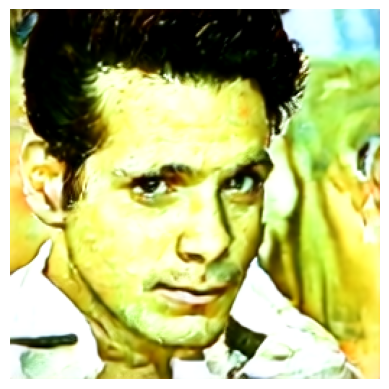

In [5]:
plt.axis('off')
plt.imshow(imagem)
plt.show()

## Simple

In [6]:
pretrained_model_or_path ="stabilityai/stable-diffusion-xl-base-1.0"
prompt = "A photo realistic clown fish in an aquarium"

In [7]:
pipeline = DiffusionPipeline.from_pretrained(pretrained_model_or_path,
                                         torch_dtype=torch.float16, use_safetensors=True).to("cuda")
#fatiamento de atenção reduz o uso de memória
pipeline.enable_attention_slicing()
imagem = pipeline(prompt=prompt).images[0]

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

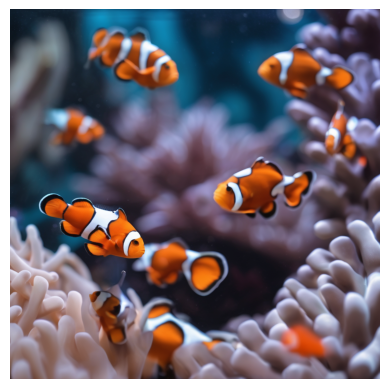

In [8]:
plt.axis('off')
plt.imshow(imagem)
plt.show()

In [9]:
imagem = pipeline(prompt="A photo realistic dog in a park").images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

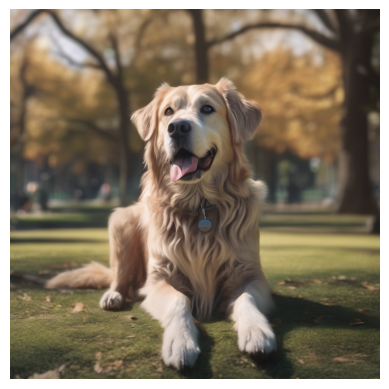

In [10]:
plt.axis('off')
plt.imshow(imagem)
plt.show()

## Condicional com mais Parâmetros

In [11]:
prompt = "Create a serene landscape with a mountain in the background, a flowing river in the foreground, and a clear blue sky."
negative_prompt = "Do not include any human or animal figures in the landscape."
pretrained_model_or_path =  "stabilityai/stable-diffusion-2-1-base"
num_images_per_prompt = 3
num_inference_steps = 100
height = 512
width = 512
guidance_scale = 8

In [12]:
scheduler = EulerDiscreteScheduler.from_pretrained(pretrained_model_or_path, subfolder="scheduler")
pipeline = StableDiffusionPipeline.from_pretrained(pretrained_model_or_path ,
                                                   scheduler=scheduler, torch_dtype=torch.float16).to("cuda")

scheduler/scheduler_config.json:   0%|          | 0.00/346 [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/911 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [15]:
#reprodutividade
generator = torch.Generator(device="cuda").manual_seed(123)
imagem = pipeline(prompt=prompt, num_images_per_prompt=num_images_per_prompt,
           negative_prompt = negative_prompt,
           num_inference_steps=num_inference_steps,
           height = height, width = width,
           guidance_scale = guidance_scale,
           generator = generator
           )

  0%|          | 0/100 [00:00<?, ?it/s]

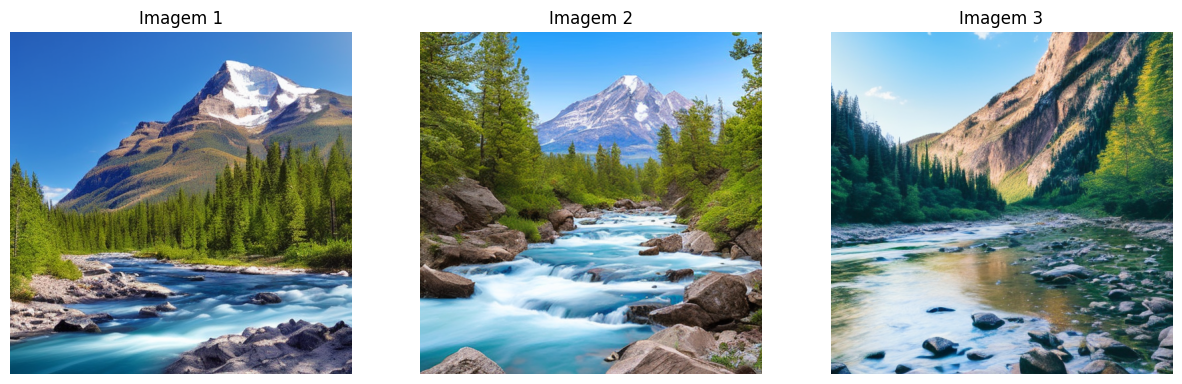

In [16]:
num_images = len(imagem["images"])
plt.figure(figsize=(15,5))
for i, img in enumerate(imagem["images"]):
    plt.subplot(1, num_images, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Imagem {i+1}')
plt.show()

## Variações de uma imagem

In [17]:
pretrained_model_or_path = "lambdalabs/sd-image-variations-diffusers"
url = "https://s3.amazonaws.com/nightjarprod/content/uploads/sites/130/2021/08/19085635/gEU2QniE6E77NI6lCU6MxlNBvIx-scaled.jpg"
num_images_per_prompt = 3
num_inference_steps = 100

In [18]:
pipeline = StableDiffusionImageVariationPipeline.from_pretrained(pretrained_model_or_path, revision="v2.0").to("cuda")
response = requests.get(url)
imagem_web = Image.open(BytesIO(response.content)).convert("RGB")
imagem = pipeline(imagem_web, num_images_per_prompt =num_images_per_prompt,  num_inference_steps = num_inference_steps)

model_index.json:   0%|          | 0.00/545 [00:00<?, ?B/s]

image_encoder/model.safetensors not found


Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

image_encoder/config.json:   0%|          | 0.00/703 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/871 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/5.01k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/284 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/595 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--lambdalabs--sd-image-variations-diffusers/snapshots/a2a13984e57db80adcc9e3f85d568dcccb9b29fc/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--lambdalabs--sd-image-variations-diffusers/snapshots/a2a13984e57db80adcc9e3f85d568dcccb9b29fc/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--lambdalabs--sd-image-variations-diffusers/snapshots/a2a13984e57db80adcc9e3f85d568dcccb9b29fc/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--lambdalabs--sd-image-variations-diffusers/snapshots/a2a13984e57db80adcc9e3f85d568dcccb9b29fc/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/100 [00:00<?, ?it/s]

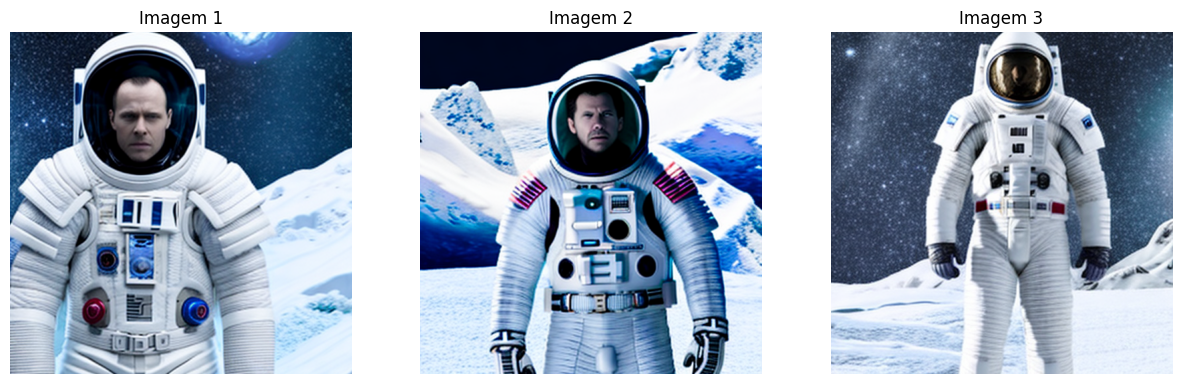

In [19]:
num_images = len(imagem["images"])
plt.figure(figsize=(15,5))
for i, img in enumerate(imagem["images"]):
    plt.subplot(1, num_images, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Imagem {i+1}')
plt.show()